# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [51]:
import numpy as np
import math
import scipy.stats as st
import pandas as pd

#### 1) STATE THE HYPOTHESIS

- Null Hypothesis (H_0): mean_1 = mean_2
- Alternative Hypothesis (H_1): mean_1 <> mean_2

#### 2) CHOOSE LEVEL OF SIGNIFICANCE

In [52]:
alpha=0.05

#### 3) DETERMINE THE TEST STATISTIC
- Student's test 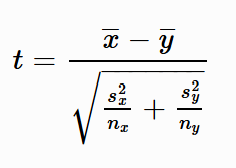

In [53]:
statistic, pvalue = st.ttest_ind(diet_1, diet_2)
print(alpha,pvalue)

0.05 0.004083270191713912


#### 4) ACCEPT OR REFUSE HYPHOTESIS

In [54]:
if pvalue < alpha:
    print("H_0 is rejected, and H_1 is assumed certain: there is a significant difference in weight loss between the two diets.")
else:
    print("H_0 cannot be rejected")

H_0 is rejected, and H_1 is assumed certain: there is a significant difference in weight loss between the two diets.


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

In [55]:
# 1) STATE THE HYPOTHESIS
'''
- Null Hypothesis (H_0): mean_1 = mean_2 = mean_3
- Alternative Hypothesis (H_1): mean_1 <> mean_2 <> mean_3
'''
# 2) CHOOSE LEVEL OF SIGNIFICANCE
alpha=0.05

# 3) DETERMINE THE TEST STATISTIC
fert_1 = np.array([20,21,20,19,20])
fert_2 = np.array([22,21,23,22,21])
fert_3 = np.array([24,23,22,23,24])

statistic, pvalue = st.f_oneway(fert_1, fert_2,fert_3)
print(alpha,pvalue)

# 4) ACCEPT OR REFUSE HYPHOTESIS
if pvalue < alpha:
    print("H_0 is rejected, and H_1 is assumed certain: there is a significant difference between fertilizers.")
else:
    print("H_0 cannot be rejected")

0.05 0.000140478247931904
H_0 is rejected, and H_1 is assumed certain: there is a significant difference between fertilizers.


Multiple comparison of means is a statistical procedure used to determine which specific group means are significantly different from one another after an ANOVA has shown that at least one mean is different. These tests, also called post-hoc tests, are necessary because performing multiple pairwise t-tests would inflate the chance of making a Type I error (a false positive).
- Tukey's Honestly Significant Difference (HSD) test: Often used when sample sizes are equal. It is good at identifying which specific pairs of means are different.

In [56]:
result = st.tukey_hsd(fert_1, fert_2,fert_3)
df_diff=pd.DataFrame(result.statistic, \
            columns=["fert_1","fert_2","fert_3"], \
            index=["fert_1","fert_2","fert_3"])
print (df_diff)

        fert_1  fert_2  fert_3
fert_1     0.0    -1.8    -3.2
fert_2     1.8     0.0    -1.4
fert_3     3.2     1.4     0.0


#### CONCLUSION

According to the results from HSD test, Fertilizer 3 is the best since it gives better diff. (positive) respect to fertilizer 1 (1.8) and fertilizer 2 (3.2).